In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing Datasets (all)
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv', index_col='Id')
weather = pd.read_csv('../assets/weather.csv')
spray = pd.read_csv('../assets/spray.csv')

#### Defined Functions

In [3]:
def eda(dataframe):
    """Runs basic EDA on dataframe."""
    print("dataframe shape \n", dataframe.shape, '\n')
    print("dataframe types \n", dataframe.dtypes, '\n')
    print("dataframe describe \n", dataframe.describe(), '\n')
    print("dataframe describe \n", dataframe.describe(exclude=np.number).T, '\n')
    print("missing values \n", dataframe.isnull().sum(), '\n')
    print("duplicate values \n", dataframe.duplicated().sum(), '\n')
    print("dataframe columns \n", dataframe.columns, '\n')
    
    #check if column is unique
    for i in dataframe.columns:
        print('{} is unique: {}'.format(i, dataframe[i].is_unique))

In [38]:
def split_date (data):
    """convert to datatime and split into year and month"""
    data['date'] = pd.to_datetime(data['date'])
    data['year'] = data.date.dt.year
    data['month'] = data.date.dt.month
    return

## <span style='background :yellow' > Train and Test Dataset </span>

##### Notes: 
- train set has 12 columns, test set has 10 columns. 'NumMosquitos' and 'WnvPresent' not found in test set
- 'WnvPresent' is our target column. 
- train has 10506 rows, test set has 116293 rows. 
- no nulls in both



.. to add on later

In [4]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [5]:
test.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
Id,,,,,,,,,,
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [6]:
eda(train)

dataframe shape 
 (10506, 12) 

dataframe types 
 Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object 

dataframe describe 
               Block      Latitude     Longitude  AddressAccuracy  \
count  10506.000000  10506.000000  10506.000000     10506.000000   
mean      35.687797     41.841139    -87.699908         7.819532   
std       24.339468      0.112742      0.096514         1.452921   
min       10.000000     41.644612    -87.930995         3.000000   
25%       12.000000     41.732984    -87.760070         8.000000   
50%       33.000000     41.846283    -87.694991         8.000000   
75%       52.000000     41.95

In [7]:
eda(test)

dataframe shape 
 (116293, 10) 

dataframe types 
 Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object 

dataframe describe 
                Block       Latitude      Longitude  AddressAccuracy
count  116293.000000  116293.000000  116293.000000    116293.000000
mean       41.131100      41.849389     -87.693658         7.954357
std        24.864726       0.106593       0.080699         1.252733
min        10.000000      41.644612     -87.930995         3.000000
25%        18.000000      41.753411     -87.750938         8.000000
50%        39.000000      41.862292     -87.694991         8.000000
75%        61.000000      41.951866     -87.648860         9.000000
max        98.000000      42

## <span style='background :yellow' > Weather Dataset </span>
- Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
- Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [8]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [9]:
eda(weather)

dataframe shape 
 (2944, 22) 

dataframe types 
 Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object 

dataframe describe 
            Station         Tmax         Tmin     DewPoint  ResultSpeed  \
count  2944.000000  2944.000000  2944.000000  2944.000000  2944.000000   
mean      1.500000    76.166101    57.810462    53.457880     6.960666   
std       0.500085    11.461970    10.381939    10.675181     3.587527   
min       1.000000    41.000000    29.000000    22.000000     0.100000   
25%       1.000000    69.000000    50.

##### Even though data showed that there is no null value, there were missing values as it is stated as M or - Hence checking columns with object dtype that most likely are suppose to be int

In [10]:
check_col = ['Tavg', 'Depart','WetBulb','Heat','Cool',
             'Sunrise','Sunset','Depth','Water1','SnowFall',
            'PrecipTotal','StnPressure','SeaLevel','AvgSpeed']

print(weather.shape)
print('')

for col in weather[check_col]:
    station_1 = len(weather[(weather[col].str.contains('\D')) & (weather['Station']==1)])
    print(f"{col}(station 1): {str(station_1)} missing values")
    
    station_2 = len(weather[(weather[col].str.contains('\D')) & (weather['Station']==2)])
    print(f"{col}(station 2): {str(station_2)} missing values")
    print('**************')

(2944, 22)

Tavg(station 1): 0 missing values
Tavg(station 2): 11 missing values
**************
Depart(station 1): 1271 missing values
Depart(station 2): 1472 missing values
**************
WetBulb(station 1): 3 missing values
WetBulb(station 2): 1 missing values
**************
Heat(station 1): 0 missing values
Heat(station 2): 11 missing values
**************
Cool(station 1): 1096 missing values
Cool(station 2): 1021 missing values
**************
Sunrise(station 1): 0 missing values
Sunrise(station 2): 1472 missing values
**************
Sunset(station 1): 0 missing values
Sunset(station 2): 1472 missing values
**************
Depth(station 1): 0 missing values
Depth(station 2): 1472 missing values
**************
Water1(station 1): 1472 missing values
Water1(station 2): 1472 missing values
**************
SnowFall(station 1): 1472 missing values
SnowFall(station 2): 1472 missing values
**************
PrecipTotal(station 1): 1472 missing values
PrecipTotal(station 2): 1472 missing values
*

##### Most missing values appear to be from station 2

In [11]:
# Drop data from station 2? 
# imputate data from station 1 (replace to 0 or avg)

## <span style='background :yellow' > Spray Dataset </span>

In [12]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [13]:
eda(spray)

dataframe shape 
 (14835, 4) 

dataframe types 
 Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object 

dataframe describe 
            Latitude     Longitude
count  14835.000000  14835.000000
mean      41.904828    -87.736690
std        0.104381      0.067292
min       41.713925    -88.096468
25%       41.785001    -87.794225
50%       41.940075    -87.727853
75%       41.980978    -87.694108
max       42.395983    -87.586727 

dataframe describe 
       count unique         top  freq
Date  14835     10  2013-08-15  2668
Time  14251   8583  7:44:32 PM   541 

missing values 
 Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64 

duplicate values 
 541 

dataframe columns 
 Index(['Date', 'Time', 'Latitude', 'Longitude'], dtype='object') 

Date is unique: False
Time is unique: False
Latitude is unique: False
Longitude is unique: False


In [14]:
# Time is too specific and it's only available in Spray dataset 
# Consider dropping?

## <span style='background :yellow' > Duplicates for Train, Weather, Spray Dataset </span>

In [15]:
print("Original Number rows in Train Dataset: ", len(train))
print("Original Number of post in Weather Dataset: ", len(weather))
print("Original Number of post in Spray Dataset: ", len(spray))
print('')

print("Original Number Duplicates in Train Dataset: ", train.duplicated().sum())
print("Original Number Duplicates in Weather Dataset: ", weather.duplicated().sum())
print("Original Number Duplicates in Spray Dataset: ", spray.duplicated().sum())
print('')

# train.drop_duplicates(inplace = True)
# weather.drop_duplicates(inplace = True)
# spray.drop_duplicates(inplace = True)

# print("Number of rows in train w/o duplicates: ", len(train))
# print("Number of rows in Weather w/o duplicates: ", len(weather))
# print("Number of rows in spray w/o duplicates: ", len(spray))

Original Number rows in Train Dataset:  10506
Original Number of post in Weather Dataset:  2944
Original Number of post in Spray Dataset:  14835

Original Number Duplicates in Train Dataset:  813
Original Number Duplicates in Weather Dataset:  0
Original Number Duplicates in Spray Dataset:  541



##### As stated, test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. Hence, will not be dropping the duplicates

## Edit formats

In [16]:
# Map the lowering function to all column names
train.columns = map(str.lower, train.columns)
test.columns = map(str.lower, test.columns)
weather.columns = map(str.lower, weather.columns)
spray.columns = map(str.lower, spray.columns)

In [17]:
# changes date and time to datetime formats
train['date'] = pd.to_datetime(train['date'], infer_datetime_format=True)
test['date'] = pd.to_datetime(test['date'], infer_datetime_format=True)
weather['date'] = pd.to_datetime(weather['date'], infer_datetime_format=True)
spray['date'] = pd.to_datetime(spray['date'], infer_datetime_format=True)
spray['time'] = pd.to_datetime(spray['date'], infer_datetime_format=True)

In [18]:
# changes time to the hour of the day
spray['time'] = spray['time'].dt.hour

In [19]:
spray.head()


,date,time,latitude,longitude
0,2011-08-29,0,42.391623,-88.089163
1,2011-08-29,0,42.391348,-88.089163
2,2011-08-29,0,42.391022,-88.089157
3,2011-08-29,0,42.390637,-88.089158
4,2011-08-29,0,42.390410,-88.088858


In [ ]:
#let me know if we want to do this makes EDA easier maybe?
# train['Address'] = train['Address'].astype('category')
# train['Species'] = train['Species'].astype('category')
# train['Street'] = train['Street'].astype('category')
# train['Trap'] = train['Trap'].astype('category')
# train['AddressNumberAndStreet'] = train['AddressNumberAndStreet'].astype('category')

## <span style='background :yellow' > EDA</span>

In [21]:
train['species'].value_counts(normalize = True)

CULEX PIPIENS/RESTUANS    0.452313
CULEX RESTUANS            0.260803
CULEX PIPIENS             0.256901
CULEX TERRITANS           0.021131
CULEX SALINARIUS          0.008186
CULEX TARSALIS            0.000571
CULEX ERRATICUS           0.000095
Name: species, dtype: float64

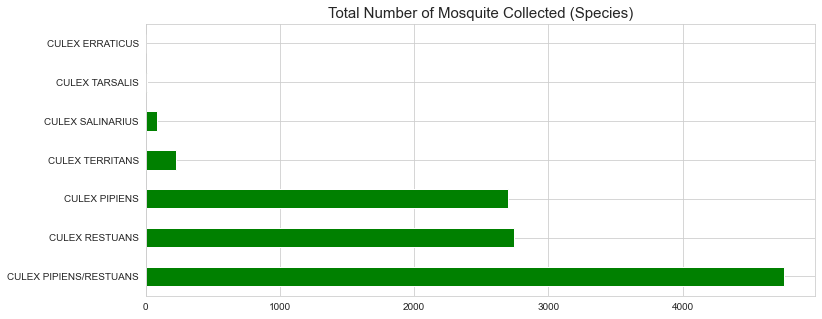

In [22]:
train['species'].value_counts().plot(kind = 'barh', color='Green', figsize=(12,5))
plt.title('Total Number of Mosquite Collected (Species)', fontsize=15);

##### There are a total of 7 species with culiex pipiens/restuans being the most.

In [24]:
# species and WNV count df
species_wnv = pd.DataFrame(train['species'].value_counts()).reset_index()

species_wnv = pd.merge(species_wnv, pd.DataFrame(train[train['wnvpresent']==1]['species'].value_counts()).reset_index(), how='left', on='index')

species_wnv.columns = ['species', 'num_observations', 'obs_w_wnv']

In [25]:
species_wnv

,species,num_observations,obs_w_wnv
0,CULEX PIPIENS/RESTUANS,4752,262.0
1,CULEX RESTUANS,2740,49.0
2,CULEX PIPIENS,2699,240.0
3,CULEX TERRITANS,222,NaN
4,CULEX SALINARIUS,86,NaN
5,CULEX TARSALIS,6,NaN
6,CULEX ERRATICUS,1,NaN


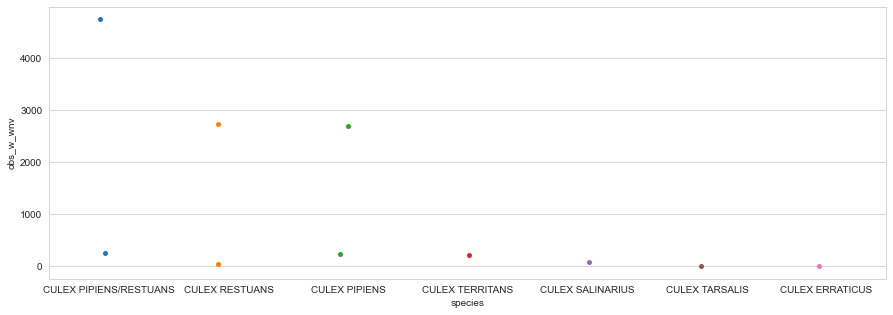

In [31]:
# consider deleting this
plt.figure(figsize=(15,5))
sns.stripplot(x="species", y="num_observations", data=species_wnv)
sns.stripplot(x="species", y="obs_w_wnv", data=species_wnv);

In [ ]:
# train['Trap'].value_counts().plot(kind = 'hist')
# plt.tight_layout();

##### Unbalance data

In [32]:
train.wnvpresent.value_counts()

0    9955
1     551
Name: wnvpresent, dtype: int64

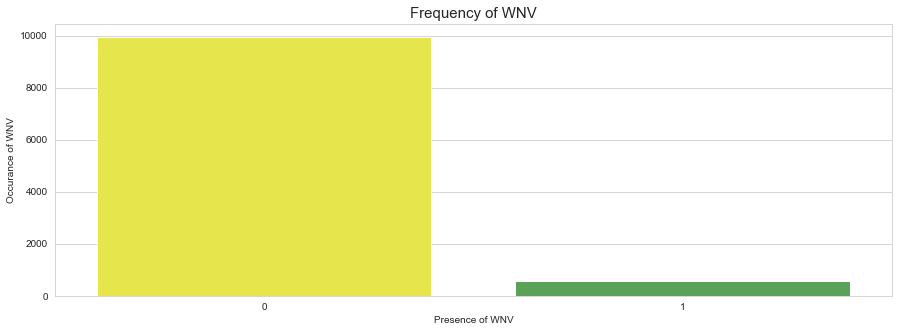

In [33]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="wnvpresent", palette='Set1_r', data=train)
plt.title('Frequency of WNV', fontsize=15)
plt.xlabel('Presence of WNV',fontsize=10)
plt.ylabel('Occurance of WNV',fontsize=10);

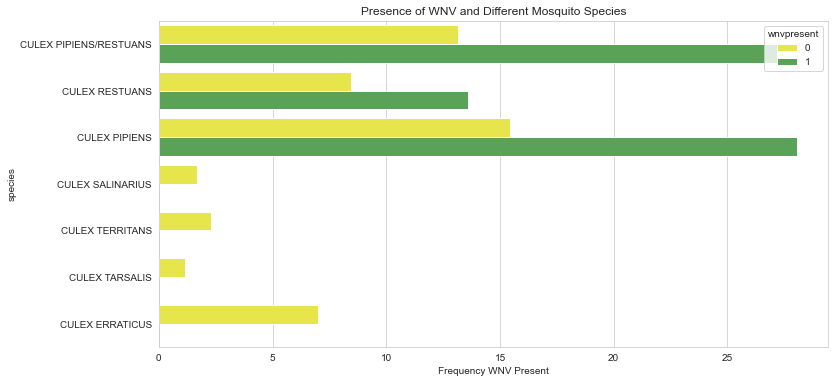

In [35]:
# Looking at the Frequency of MNV in difference mosquito species
plt.figure(figsize=(12,6))
sns.barplot(y='species', x='nummosquitos', hue='wnvpresent', data=train, palette='Set1_r', ci=None)
plt.title('Presence of WNV and Different Mosquito Species')
plt.xlabel('Frequency WNV Present');

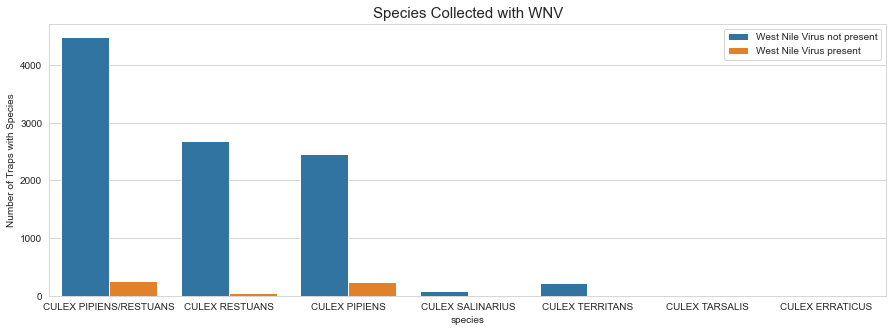

In [30]:
# duplicate of above
plt.figure(figsize=(15,5))
sns.countplot(x='species', hue='wnvpresent', data=train)
plt.xticks(rotation=0)
plt.legend(['West Nile Virus not present', 'West Nile Virus present'], loc=1)
plt.ylabel('Number of Traps with Species')
plt.title('Species Collected with WNV', fontsize=15);

In [36]:
train[train['wnvpresent'] == 1]['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS'],
      dtype=object)

##### WNV is only present in the following 3 species of Mosquitos (In train Dataset):
- CULEX PIPIENS/RESTUANS
- CULEX PIPIENS
- CULEX RESTUANS

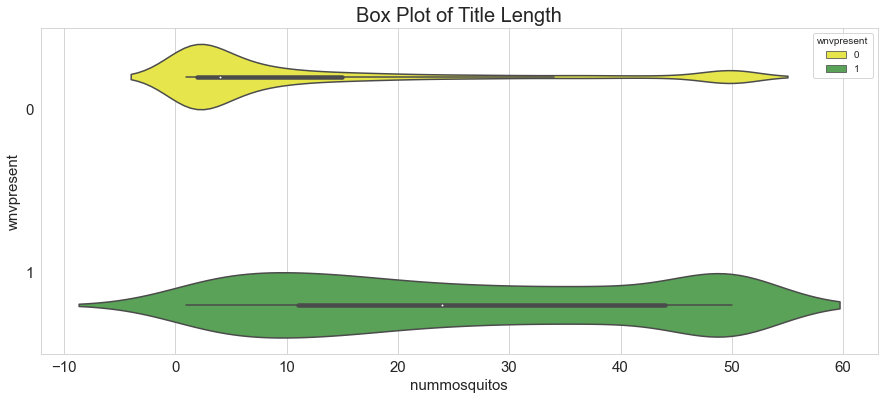

In [37]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.violinplot(y= 'wnvpresent', 
                    x='nummosquitos',
                    data=train, 
                    orient='h', 
                    hue='wnvpresent',
                    palette='Set1_r')

ax.set_title('Box Plot of Title Length',fontsize=20)
ax.set_xlabel("nummosquitos",fontsize=15)
ax.set_ylabel("wnvpresent",fontsize=15)
ax.tick_params(labelsize=15)

##### With WnvPresent==0, there is quite a number of outliers

## <span style='background :yellow' > Feature Engineering </span>

In [39]:
split_date(train)
split_date(test)
split_date(weather)
split_date(spray)

Text(0, 0.5, 'Average Number of Mosquitos in Trap')

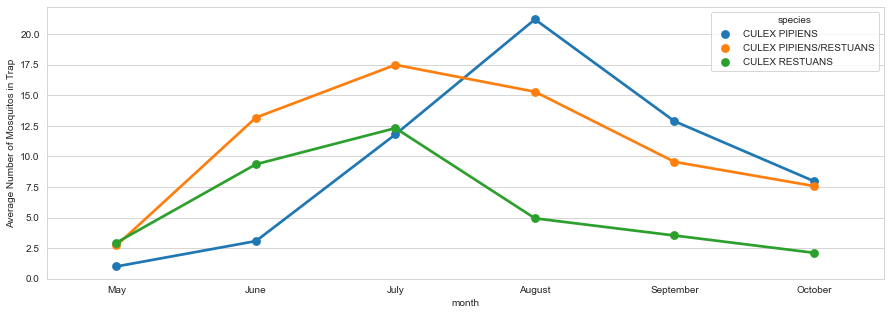

In [41]:
# add title
plt.figure(figsize=(15,5))
_ = sns.pointplot(x='month', y="nummosquitos", hue='species', data=train[train['species'].isin(['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'])].groupby(['month', 'species'], as_index=False)['nummosquitos'].mean(),)
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Number of Mosquitos in Trap')
#plt.legend(['Culex Pipiens', 'Culex Pipiens/Restuans', 'Culex Restuans'])

In [ ]:
# split up species
def dummify_species (data):
    #Convert Date column to Date time object
    data['species'] = pd.get_dummies(data, columns = ['species'])   
    return

In [ ]:
dummify_species(train)
dummify_species(test)

## <span style='background :yellow' > Merging DataFrame </span>